<a href="https://colab.research.google.com/github/JazminaNurinNatasya/Kijang-Emas/blob/main/LSTM_KIJANG_EMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# Install the necessary modules
!pip install ipywidgets

# Import the necessary modules
import io
import pandas as pd
from ipywidgets import FileUpload

# Create a file upload widget
uploader = FileUpload()
uploader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


FileUpload(value={}, description='Upload')

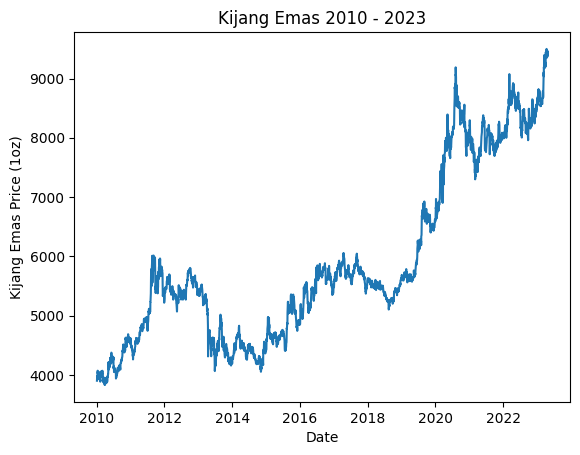

In [ ]:
# Load the dataset
data = pd.read_csv(io.BytesIO(uploader.data[0]))

# Convert Date to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Optionally, plot the gold prices
plt.plot(data['oz'])
plt.title('Kijang Emas 2010 - 2023')
plt.xlabel('Date')
plt.ylabel('Kijang Emas Price (1oz)')
plt.show()

In [ ]:
# Scale the price data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['oz'].values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8) #adjust splitting ratio
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:] # Changed to use scaled data

# Prepare the input and output sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 365 #adjust sequence length
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - loss: 0.0304
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0016
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - loss: 0.0014
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.0012
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 0.0012
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - loss: 0.0010
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - loss: 9.5792e-04
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 0.0010
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - loss: 0.0011
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - loss: 9.2427e-04
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - loss: 9.5473e-04
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - loss: 8.2334e-04
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - loss: 8.6144e-04
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 9.1239e-04
Epoch 15/20
70/70 ━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [ ]:
# Predict on the train set
pred = model.predict(X_train)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
pred_actual = scaler.inverse_transform(pred)

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


In [ ]:
# Evaluate the model
mse = np.mean((pred_actual - y_train_actual) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(pred_actual - y_train_actual))
mape = np.mean(np.abs((pred_actual - y_train_actual) / y_train_actual))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 9211.54021712516
Root Mean Squared Error: 95.97676915340067
Mean Absolute Error: 67.63819193668503
Mean Absolute Percentage Error: 0.012398299920208918


In [ ]:
predictions = model.predict(X_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
predictions_actual = scaler.inverse_transform(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
# Evaluate the model
mse = np.mean((predictions_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(predictions_actual - y_test_actual))
mape = np.mean(np.abs((predictions_actual - y_test_actual) / y_test_actual))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 12328.717850973244
Root Mean Squared Error: 111.03475965198125
Mean Absolute Error: 86.5555812444788
Mean Absolute Percentage Error: 0.01009511420884646


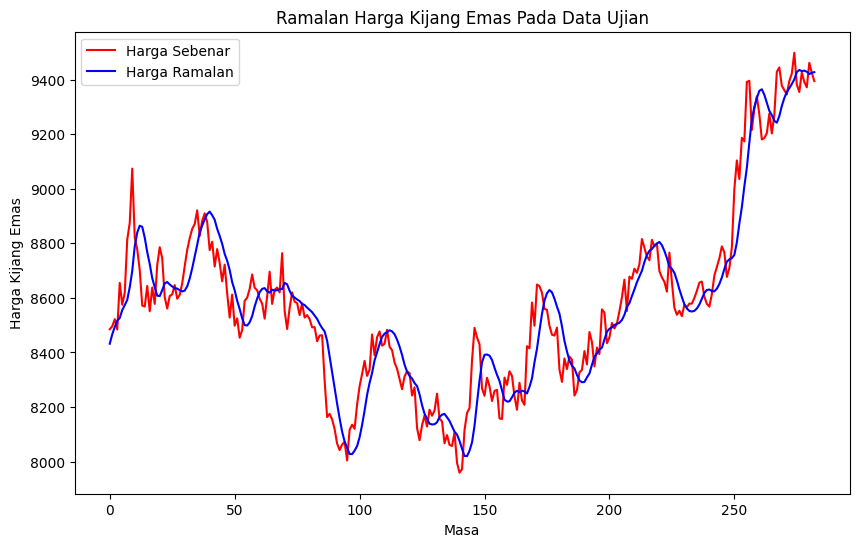

In [ ]:
# Plot predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='red', label='Harga Sebenar')
plt.plot(predictions_actual, color='blue', label='Harga Ramalan')
plt.title('Ramalan Harga Kijang Emas Pada Data Ujian')
plt.xlabel('Masa')
plt.ylabel('Harga Kijang Emas')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Make predictions on the test set
predicted_prices1 = model.predict(X_test)

# Inverse transform the predictions and actual test values to get the original prices
predicted_prices1 = scaler.inverse_transform(predicted_prices1)
actual_prices1 = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the correct date indices for the test set
# Calculate the starting index for the test set in the original 'data' DataFrame
test_start_index = len(data) - len(X_test)
# Slice 'data.index' to get the corresponding dates for the test set
date_indices = data.index[test_start_index : ]

# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({
    'Date': date_indices,  # Use correct date indices
    'Actual Price': actual_prices1.flatten(),
    'Predicted Price': predicted_prices1.flatten()
})

# Display the comparison table (first 10 rows)
print(comparison_df.head(10))

print(comparison_df.tail(10))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
        Date  Actual Price  Predicted Price
0 2022-02-24        8485.0      8432.019531
1 2022-02-25        8496.0      8466.482422
2 2022-02-28        8522.0      8493.526367
3 2022-03-01        8484.0      8516.218750
4 2022-03-02        8655.0      8526.364258
5 2022-03-03        8575.0      8555.628906
6 2022-03-04        8619.0      8573.532227
7 2022-03-07        8814.0      8592.689453
8 2022-03-08        8875.0      8639.134766
9 2022-03-09        9074.0      8698.668945
          Date  Actual Price  Predicted Price
273 2023-04-13        9423.0      9384.275391
274 2023-04-14        9499.0      9401.271484
275 2023-04-17        9382.0      9428.242188
276 2023-04-18        9355.0      9435.748047
277 2023-04-19        9426.0      9431.530273
278 2023-04-20        9392.0      9433.241211
279 2023-04-25        9372.0      9429.330078
280 2023-04-26        9462.0      9420.606445
281 2023-04-27        9425.0      9425.376953
282 2023-04-28    

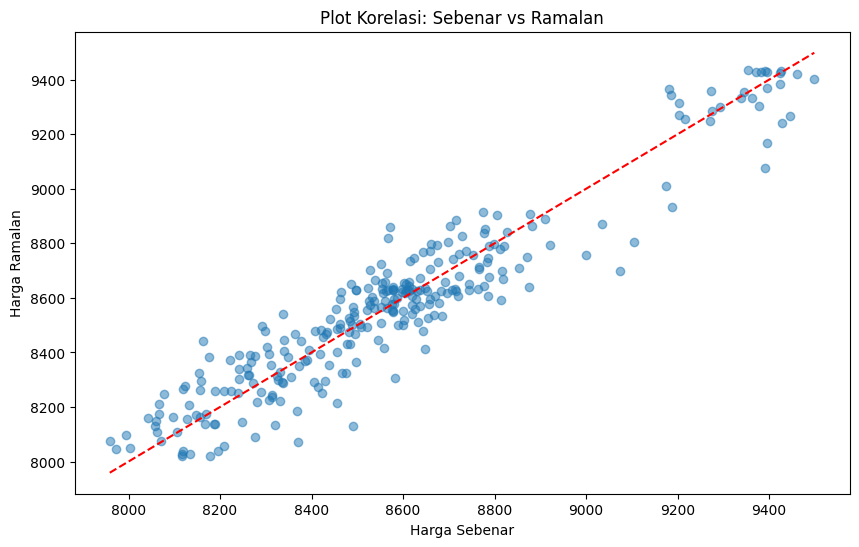

Correlation: 0.9455123673508147
R-squared (R²): 0.8939936368133419


In [ ]:
# prompt: cor plot actual vs forecast

# Assuming 'comparison_df' is your DataFrame with 'Actual Price' and 'Predicted Price'
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(comparison_df['Actual Price'], comparison_df['Predicted Price'], alpha=0.5)
plt.xlabel('Harga Sebenar')
plt.ylabel('Harga Ramalan')
plt.title('Plot Korelasi: Sebenar vs Ramalan')
plt.plot([min(comparison_df['Actual Price']), max(comparison_df['Actual Price'])],
         [min(comparison_df['Actual Price']), max(comparison_df['Actual Price'])],
         color='red', linestyle='--') # Add a diagonal line for reference

plt.show()
cor = comparison_df['Actual Price'].corr(comparison_df['Predicted Price'])
print(f"Correlation: {cor}")
rsquare = comparison_df['Actual Price'].corr(comparison_df['Predicted Price'])**2
print(f"R-squared (R²): {rsquare}")

In [ ]:
import pandas as pd
from datetime import date, timedelta

# Assuming 'data' is your original DataFrame
last_date = data.index[-1]  # Get the last date in your data

# Get the number of predictions to be made (Assuming it's based on X_test1)
num_predictions = len(X_test)

# Create future_dates with the correct length
future_dates = [last_date + timedelta(days=i) for i in range(1, num_predictions + 1)]

# Make predictions using your model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Inverse transform if necessary

# Create the 'future_data' DataFrame
future_data = pd.DataFrame({'Date': future_dates, 'oz': predicted_prices.flatten()})
future_data.set_index('Date', inplace=True)  # Set 'Date' as the index

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

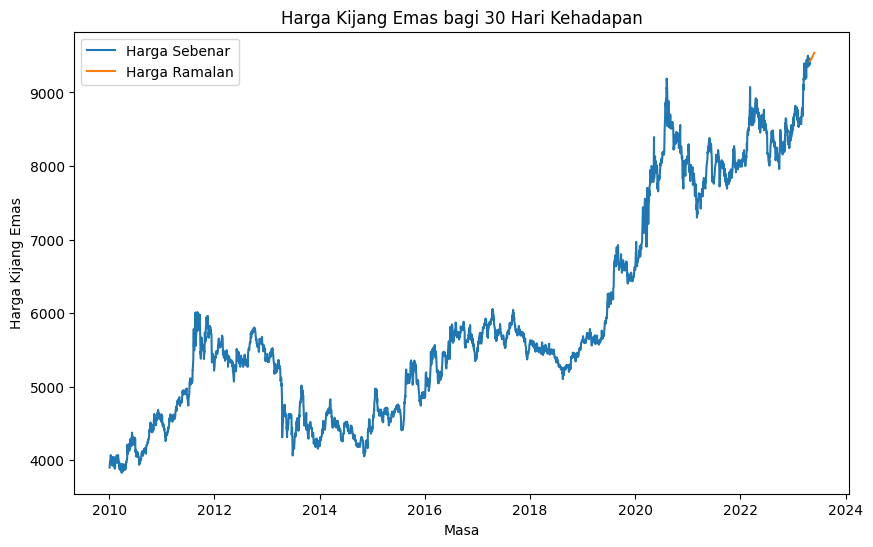

Gold Price Forecast for the Next 30 Days:


,Predicted Price
Date,
2023-04-29,9425.068359
2023-04-30,9426.097656
2023-05-01,9428.009766
2023-05-02,9430.506836
2023-05-03,9433.446289
2023-05-04,9436.716797
2023-05-05,9440.239258
2023-05-06,9443.959961
2023-05-07,9447.834961


In [ ]:
# Forecast for the next 7 days
last_60_days = scaled_data[-sequence_length:]  # Get the last 60 days of scaled data
forecast_input = last_60_days.reshape(1, sequence_length, 1)  # Reshape for LSTM input

# Make predictions for the next 7 days
forecast_predictions = []
for _ in range(30):
  predicted_value = model.predict(forecast_input)
  forecast_predictions.append(predicted_value[0, 0])
  # Fix: Reshape predicted_value and then append along axis 1
  forecast_input = np.append(forecast_input[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse scale the forecast predictions
forecast_predictions = scaler.inverse_transform(np.array(forecast_predictions).reshape(-1, 1))

# Get the dates for the next 7 days
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': forecast_predictions.flatten()})
forecast_df.set_index('Date', inplace=True)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['oz'], label='Harga Sebenar')
plt.plot(forecast_df['Predicted Price'], label='Harga Ramalan')
plt.title('Harga Kijang Emas bagi 30 Hari Kehadapan')
plt.xlabel('Masa')
plt.ylabel('Harga Kijang Emas')
plt.legend()
plt.show()

# Print the forecast
print("Gold Price Forecast for the Next 30 Days:")
forecast_df

In [ ]:
# Create a DataFrame to compare actual and predicted prices
actual_prices2 = [9372,9462,9425,9395,9387,9530,9653,9499,9510,9622,9598,9579,9552,9605,9537,9510,9441,9522,9511,9589,9557,9520,9490,9496,9550,9609,9634,9552,9594,9506]

# Ensure date_indices has the same length as actual_prices2 and forecast_df['Predicted Price']
date_indices = date_indices[:len(actual_prices2)] # Adjust date_indices to the length of actual_prices2

comparison_df2 = pd.DataFrame({
    'Date': date_indices,  # Use correct date indices
    'Actual Price': actual_prices2,
    'Predicted Price': forecast_df['Predicted Price'].values[:len(actual_prices2)] # Access the 'Predicted Price' column's values and slice it to the length of actual_prices2
})

# Display the comparison table (first 10 rows)
print(comparison_df2.head(10))

        Date  Actual Price  Predicted Price
0 2022-02-24          9372      9425.068359
1 2022-02-25          9462      9426.097656
2 2022-02-28          9425      9428.009766
3 2022-03-01          9395      9430.506836
4 2022-03-02          9387      9433.446289
5 2022-03-03          9530      9436.716797
6 2022-03-04          9653      9440.239258
7 2022-03-07          9499      9443.959961
8 2022-03-08          9510      9447.834961
9 2022-03-09          9622      9451.832031


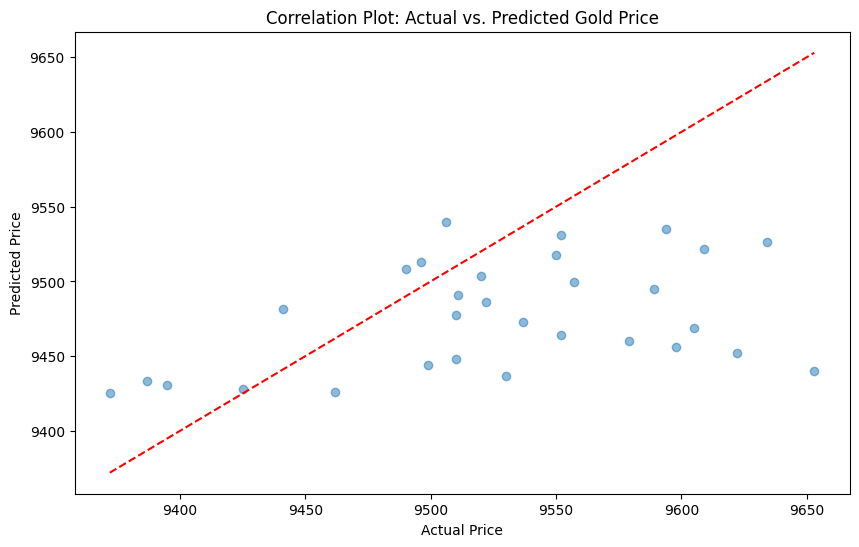

Correlation: 0.4118083362776212
R-squared (R²): -0.31651079654693604


In [ ]:
# prompt: cor plot actual vs forecast
from sklearn.metrics import r2_score
# Assuming 'comparison_df' is your DataFrame with 'Actual Price' and 'Predicted Price'
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(comparison_df2['Actual Price'], comparison_df2['Predicted Price'], alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Correlation Plot: Actual vs. Predicted Gold Price')
plt.plot([min(comparison_df2['Actual Price']), max(comparison_df2['Actual Price'])],
         [min(comparison_df2['Actual Price']), max(comparison_df2['Actual Price'])],
         color='red', linestyle='--') # Add a diagonal line for reference

plt.show()
cor = comparison_df2['Actual Price'].corr(comparison_df2['Predicted Price'])
print(f"Correlation: {cor}")
r2 = r2_score(comparison_df2['Actual Price'], comparison_df2['Predicted Price'])
print(f"R-squared (R²): {r2}")

test

In [ ]:
def forecast_future(model, scaler, data, look_back, steps_ahead):
    """
    Forecast future values beyond the dataset.
    Args:
        model: Trained LSTM model
        scaler: Fitted scaler to inverse transform the data
        data: Array of scaled data (last `look_back` rows of the dataset)
        look_back: Number of past steps to use for prediction
        steps_ahead: Number of future steps to predict
    Returns:
        List of predicted future values (original scale)
    """
    future_predictions = []
    current_input = data[-look_back:]  # Start with the last `look_back` data points

    for _ in range(steps_ahead):
        # Reshape to match LSTM input format: (samples, timesteps, features)
        current_input_reshaped = current_input.reshape(1, look_back, 1)

        # Predict next value
        predicted = model.predict(current_input_reshaped, verbose=0)

        # Append prediction (store original scale)
        predicted_original_scale = scaler.inverse_transform(predicted)[0][0]
        future_predictions.append(predicted_original_scale)

        # Update the input sequence with the new prediction
        current_input = np.append(current_input[1:], predicted, axis=0)

    return future_predictions

In [ ]:
# Number of steps ahead to forecast
steps_ahead = 30  # e.g., forecast for the next 30 days

# Extract the last look_back values from scaled data
last_sequence = scaled_data[-sequence_length:]

# Forecast future values
future_forecasts = forecast_future(model, scaler, last_sequence, sequence_length, steps_ahead)

# Create a DataFrame for visualization
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=steps_ahead)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': future_forecasts})

# Combine the original data and forecast
combined_df = pd.concat([
    data.reset_index(),
    forecast_df
], ignore_index=True)

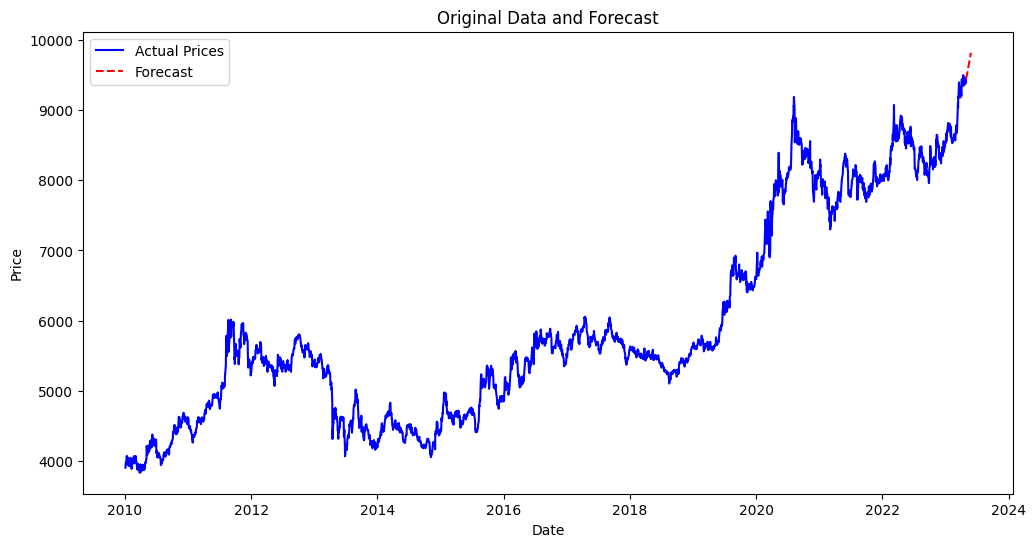

In [ ]:
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Prices', color='blue')

# Plot forecasted data
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], label='Forecast', color='red', linestyle='--')

plt.title('Original Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()